In [1]:
%matplotlib notebook
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '' # Use CPU

import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K


from abyss_deep_learning.keras.activations import Hexpo

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<IPython.core.display.Javascript object>


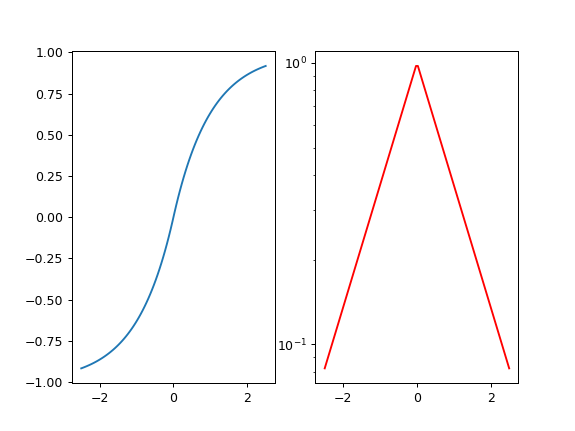

In [2]:
a, b, c, d = 1, 1, 1, 1
input_shape = (100, 1)
x_data = np.linspace(-2.5, 2.5, input_shape[0])[..., np.newaxis]

with K.tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
    x = K.tf.placeholder(K.tf.float32, shape=((None,) + input_shape[1:]),name='x')
    feed_dict = {x: x_data}
    hexpo_y = Hexpo._activation(x, a, b, c, d)
    hexpo_dy = K.tf.gradients(hexpo_y, x)
    result = sess.run([hexpo_y, hexpo_dy], feed_dict=feed_dict)

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(feed_dict[x], result[0])
plt.subplot(1, 2, 2)
plt.semilogy(feed_dict[x].squeeze(), np.array(result[1]).squeeze(), 'r')

In [3]:
N = 1000
input_shape = (48, 64, 1)
func = lambda x: np.sin(x) + 1
x_train = np.random.uniform(-1, 1, size=((N,) + input_shape))
x_test = np.random.uniform(-1, 1, size=((N,) + input_shape))
y_train = func(x_train)
y_test = func(x_test)
print(x_train.shape)

(1000, 48, 64, 1)


In [4]:
from keras.layers.advanced_activations import PReLU
def make_model(input_shape):
    from keras.layers import Input, Dense
    from keras.models import Model
    a, b, c, d = 1, 1, 1, 1
    x = Input(shape=input_shape)
    y = Hexpo(shared_axes=(1, 2))(Dense(1)(x))
    y = Hexpo(shared_axes=(1, 2))(Dense(1)(y))
    return Model(x, y)

model = make_model(input_shape)
model.compile(loss='mse', optimizer='nadam')
model.fit(x_train, y_train, verbose=1, epochs=10, validation_split=0.1)
y_pred = model.predict(x_test, batch_size=100)
# y_train
# plt.figure()
# plt.subplot(1, 2, 1)
# plt.plot(feed_dict[x], result[0])
# plt.subplot(1, 2, 2)
# plt.semilogy(feed_dict[x].squeeze(), np.array(result[1]).squeeze(), 'r')
model.summary()

[48, 64, 1]
[48, 64, 1]
Train on 900 samples, validate on 100 samples
Epoch 1/10
900/900 [==============================] - 1s 612us/step - loss: 0.8982 - val_loss: 0.7672
Epoch 2/10
900/900 [==============================] - 0s 235us/step - loss: 0.6592 - val_loss: 0.5431
Epoch 3/10
900/900 [==============================] - 0s 266us/step - loss: 0.4523 - val_loss: 0.3556
Epoch 4/10
900/900 [==============================] - 0s 276us/step - loss: 0.2827 - val_loss: 0.2080
Epoch 5/10
900/900 [==============================] - 0s 278us/step - loss: 0.1580 - val_loss: 0.1115
Epoch 6/10
900/900 [==============================] - 0s 281us/step - loss: 0.0878 - val_loss: 0.0690
Epoch 7/10
900/900 [==============================] - 0s 269us/step - loss: 0.0616 - val_loss: 0.0556
Epoch 8/10
900/900 [==============================] - 0s 279us/step - loss: 0.0524 - val_loss: 0.0494
Epoch 9/10
900/900 [==============================] - 0s 275us/step - loss: 0.0475 - val_loss: 0.0454
Epoch 10/10


In [5]:
# print(model.get_config())

for w in model.get_layer(name='hexpo_1').trainable_weights:
    print(K.eval(w))
    
model.get_layer(name='hexpo_1').get_config()

[[[0.76111615]]]
[[[1.2206784]]]
[[[1.2818084]]]
[[[0.69261634]]]


{'constraints': {'a': None, 'b': None, 'c': None, 'd': None},
 'initializers': {'a': {'class_name': 'Constant', 'config': {'value': 1.0}},
  'b': {'class_name': 'Constant', 'config': {'value': 1.0}},
  'c': {'class_name': 'Constant', 'config': {'value': 1.0}},
  'd': {'class_name': 'Constant', 'config': {'value': 1.0}}},
 'name': 'hexpo_1',
 'regularizers': {'a': None, 'b': None, 'c': None, 'd': None},
 'shared_axes': [1, 2],
 'trainable': True}